# Project Overview

Features are computed from a digitized image of a breast mass. The cell nuclei in the image have certain characteristics. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server:

ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/

# Attribute information:

ID number
Diagnosis (M = Malignant(Cancerous) or B = Benign(Not Cancerous))

# Step 1: Import libraries and data gathering 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from sklearn.datasets import load_breast_cancer

In [4]:
cancer = load_breast_cancer()

# Step 2: Exploring format and parameters

In [5]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [6]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [7]:
cancer['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

# Set up Data Frame

In [8]:
df_feat = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])
df_feat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [9]:
df_target = pd.DataFrame(cancer['target'],columns=['Cancer'])
df_target.head(5)

,Cancer
0,0
1,0
2,0
3,0
4,0


In [10]:
df_feat.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
#---check for 0s---
print("0s")
print("==")
print(df_feat.eq(0).sum())

0s
==
mean radius                 0
mean texture                0
mean perimeter              0
mean area                   0
mean smoothness             0
mean compactness            0
mean concavity             13
mean concave points        13
mean symmetry               0
mean fractal dimension      0
radius error                0
texture error               0
perimeter error             0
area error                  0
smoothness error            0
compactness error           0
concavity error            13
concave points error       13
symmetry error              0
fractal dimension error     0
worst radius                0
worst texture               0
worst perimeter             0
worst area                  0
worst smoothness            0
worst compactness           0
worst concavity            13
worst concave points       13
worst symmetry              0
worst fractal dimension     0
dtype: int64


# Step 3: Target distribution

1    357
0    212
Name: Cancer, dtype: int64


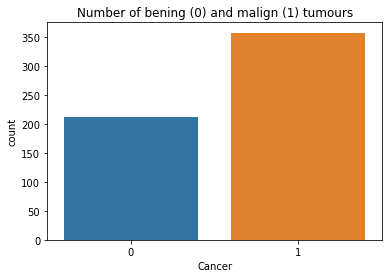

In [39]:
#First, we will plot the count
sns.countplot(x=df_target['Cancer'])
plt.title('Number of bening (0) and malign (1) tumours')
print(df_target['Cancer'].value_counts())

# Step 4: Features distribution

In [13]:
frames = [df_feat,df_target]
df_all = pd.concat(frames,axis=1,sort=False)
print(df_all.head(2))

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38           122.8     1001.0          0.11840   
1        20.57         17.77           132.9     1326.0          0.08474   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07871  ...          17.33            184.6      2019.0   
1                 0.05667  ...          23.41            158.8      1956.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   

   worst symmetry  worst fractal dimension  Cancer  
0          0.

In [45]:
# We have two datasets, which consist of malignant and benign data.
M = df_all[df_all['Cancer'] != 0]
B = df_all[df_all['Cancer'] == 0]

In [125]:
def plot_distribution(data_select, size_bin) :  
    tmp1 = M[data_select]
    tmp2 = B[data_select]
    hist_data = [tmp1, tmp2]

    plt.figure(figsize=(10,5))
    fig = sns.histplot(df_all, x=data_select, bins=size_bin, hue='Cancer')
    

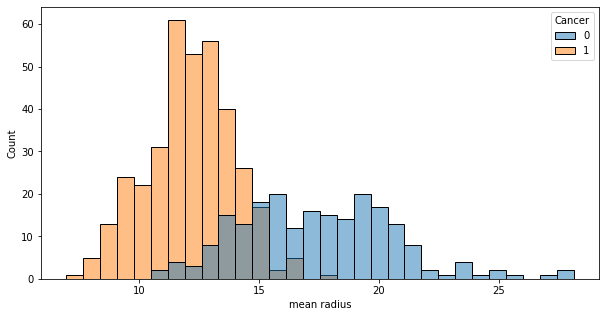

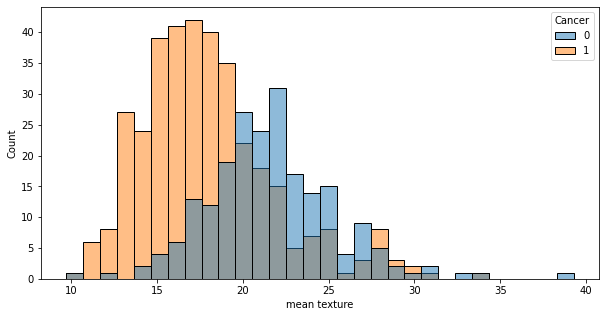

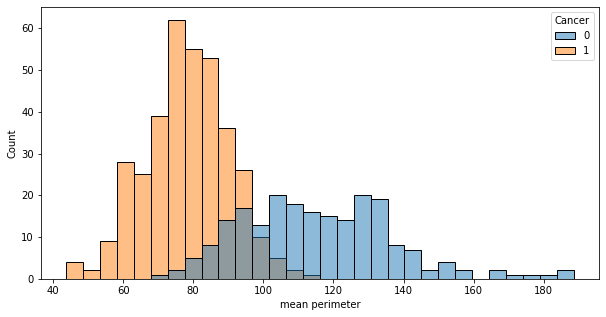

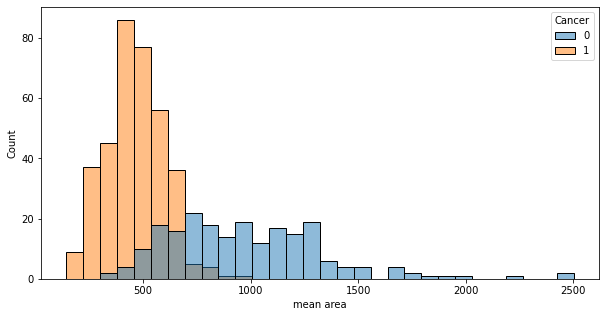

In [126]:
#plot distribution 'mean' using binning =100
mybin = 30
plot_distribution('mean radius', mybin)
plot_distribution('mean texture', mybin)
plot_distribution('mean perimeter', mybin)
plot_distribution('mean area', mybin)

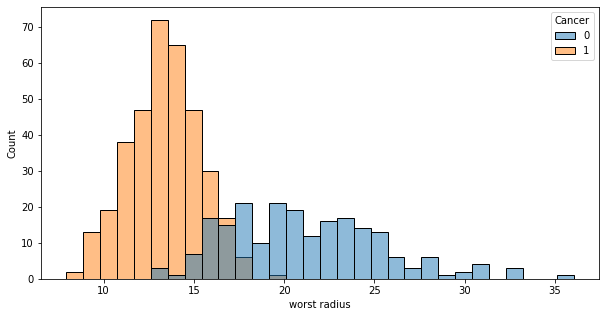

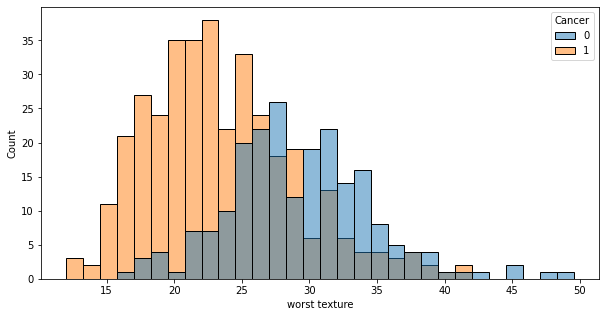

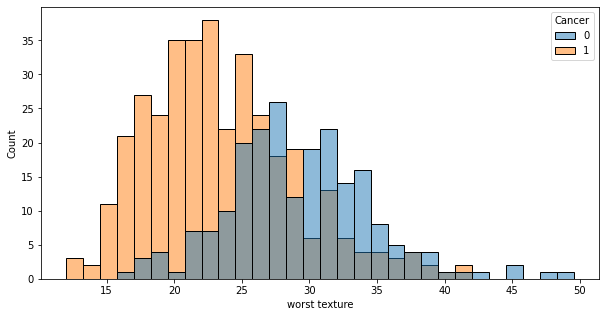

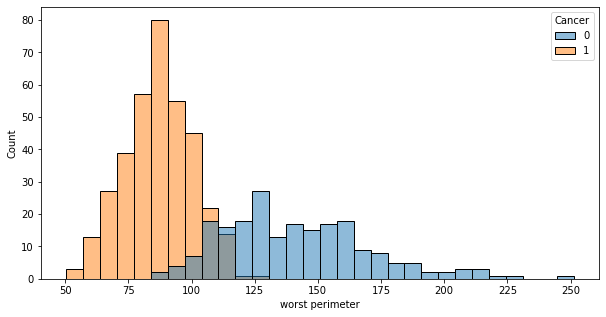

In [127]:
#plot distribution 'worst'
plot_distribution('worst radius', mybin)
plot_distribution('worst texture', mybin)
plot_distribution('worst texture', mybin)
plot_distribution('worst perimeter', mybin)

# Step 5: Correlated features

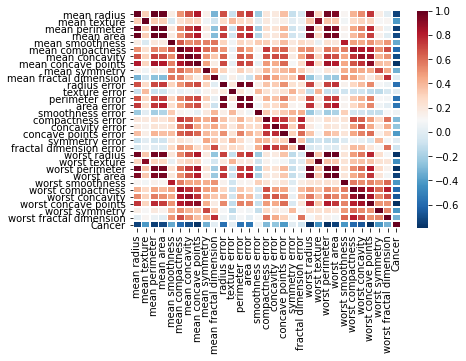

In [88]:
pearsoncorr = df_all.corr(method='pearson')

sns.heatmap(pearsoncorr,
               xticklabels=pearsoncorr.columns,
               yticklabels=pearsoncorr.columns,
               cmap='RdBu_r',
               linewidth=0.5)
plt.show()

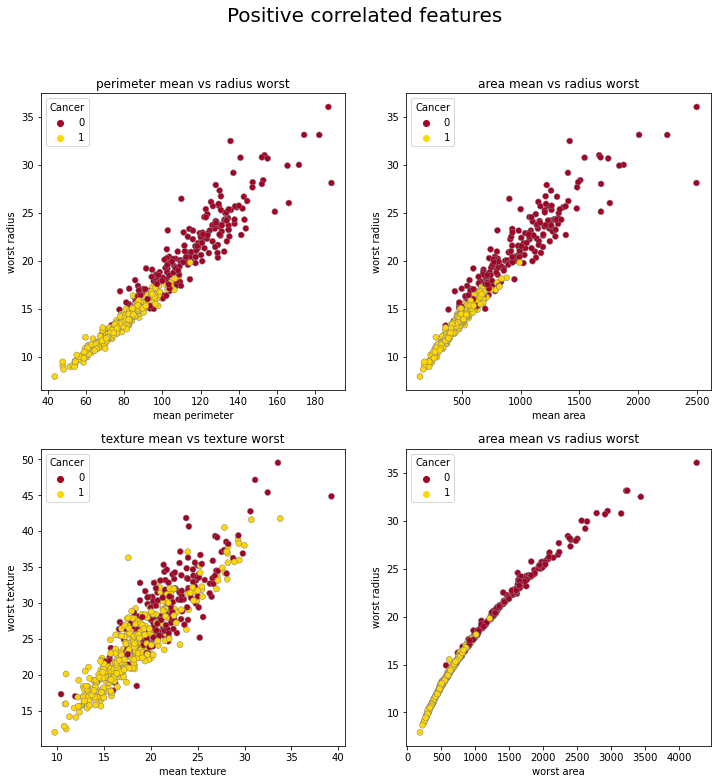

In [100]:
palette ={0 : '#a50026', 1 : 'gold'}
edgecolor = 'grey'

# Plot +
fig = plt.figure(figsize=(12,12))

plt.subplot(221)
ax1 = sns.scatterplot(x = df_all['mean perimeter'], y = df_all['worst radius'], hue = "Cancer",
                    data = df_all, palette = palette, edgecolor=edgecolor)
plt.title('perimeter mean vs radius worst')
plt.subplot(222)
ax2 = sns.scatterplot(x = df_all['mean area'], y = df_all['worst radius'], hue = "Cancer",
                    data = df_all, palette =palette, edgecolor=edgecolor)
plt.title('area mean vs radius worst')
plt.subplot(223)
ax3 = sns.scatterplot(x = df_all['mean texture'], y = df_all['worst texture'], hue = "Cancer",
                    data = df_all, palette =palette, edgecolor=edgecolor)
plt.title('texture mean vs texture worst')
plt.subplot(224)
ax4 = sns.scatterplot(x = df_all['worst area'], y = df_all['worst radius'], hue = "Cancer",
                    data = df_all, palette =palette, edgecolor=edgecolor)
plt.title('area mean vs radius worst')

fig.suptitle('Positive correlated features', fontsize = 20)
plt.savefig('1')
plt.show()

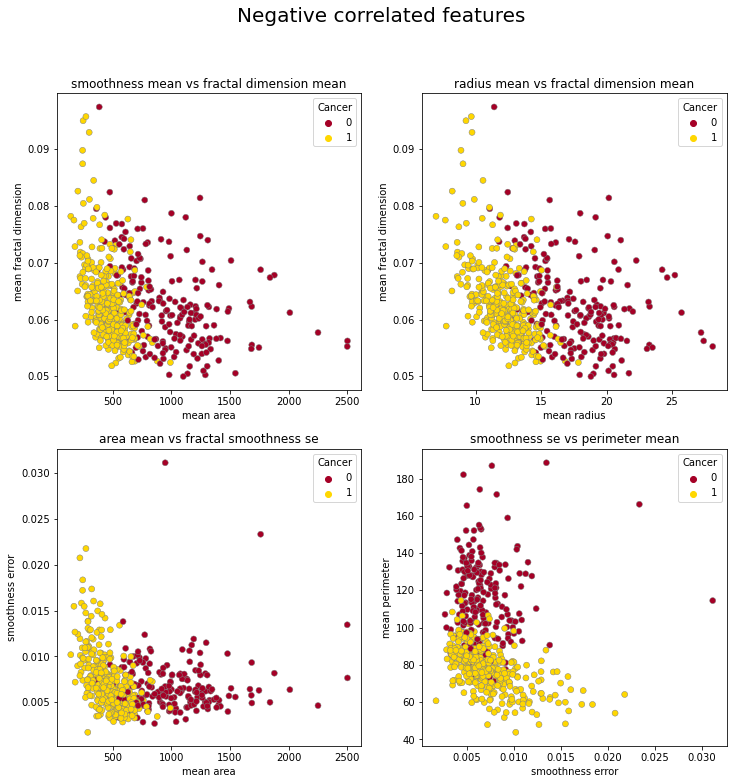

In [101]:
fig = plt.figure(figsize=(12,12))

plt.subplot(221)
ax1 = sns.scatterplot(x = df_all['mean area'], y = df_all['mean fractal dimension'], hue = "Cancer",
                    data = df_all, palette =palette, edgecolor=edgecolor)
plt.title('smoothness mean vs fractal dimension mean')
plt.subplot(222)
ax2 = sns.scatterplot(x = df_all['mean radius'], y = df_all['mean fractal dimension'], hue = "Cancer",
                    data = df_all, palette =palette, edgecolor=edgecolor)
plt.title('radius mean vs fractal dimension mean')
plt.subplot(223)
ax2 = sns.scatterplot(x = df_all['mean area'], y = df_all['smoothness error'], hue = "Cancer",
                    data = df_all, palette =palette, edgecolor=edgecolor)
plt.title('area mean vs fractal smoothness se')
plt.subplot(224)
ax2 = sns.scatterplot(x = df_all['smoothness error'], y = df_all['mean perimeter'], hue = "Cancer",
                    data = df_all, palette =palette, edgecolor=edgecolor)
plt.title('smoothness se vs perimeter mean')

fig.suptitle('Negative correlated features', fontsize = 20)
plt.savefig('3')
plt.show()

# Step 7: Dimensionality reduction and scaling of features

In [97]:
#---get the top four features that has the highest correlation---
print(df_all.corr().nlargest(5, 'Cancer').index)
#---print the top 4 correlation values---
print(df_all.corr().nlargest(5, 'Cancer').values[:,-1])

Index(['Cancer', 'smoothness error', 'mean fractal dimension', 'texture error',
       'symmetry error'],
      dtype='object')
[1.         0.06701601 0.0128376  0.00830333 0.00652176]


## Scale the features

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_feat)
scaled_features = scaler.transform(df_feat)
df_feat_scal = pd.DataFrame(scaled_features,columns=df_feat.columns)
df_feat_scal.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [16]:
frames = [df_feat_scal,df_target]
df_all_scal = pd.concat(frames,axis=1,sort=False)
print(df_all_scal.head(2))


   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0     1.097064     -2.073335        1.269934   0.984375         1.568466   
1     1.829821     -0.353632        1.685955   1.908708        -0.826962   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0          3.283515        2.652874             2.532475       2.217515   
1         -0.487072       -0.023846             0.548144       0.001392   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                2.255747  ...      -1.359293         2.303601    2.001237   
1               -0.868652  ...      -0.369203         1.535126    1.890489   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0          1.307686           2.616665         2.109526              2.296076   
1         -0.375612          -0.430444        -0.146749              1.087084   

   worst symmetry  worst fractal dimension  Cancer  
0        2.75

In [17]:
n=3
#---get the top four features that has the highest correlation---
print(df_all_scal.corr().nsmallest(n, 'Cancer').index)
#---print the top 4 correlation values---
print(df_all_scal.corr().nsmallest(n, 'Cancer').values[:,-1])

Index(['worst concave points', 'worst perimeter', 'mean concave points'], dtype='object')
[-0.79356602 -0.78291414 -0.77661384]


# Step 8:  Data Modelling

In [18]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
#---features---
X = df_feat_scal[['worst concave points', 'worst perimeter', 'mean concave points']]
#---label---
y = df_target['Cancer']
#print(y)


### Linear Regression model

In [19]:
# first LR

log_regress = linear_model.LogisticRegression(solver='lbfgs', max_iter=10000)
log_regress_score = cross_val_score(log_regress, X, y, cv=3,
                    scoring='accuracy').mean()
print(log_regress_score)

0.9402487700733314


In [20]:
# catch last result
result = []
result.append(log_regress_score)

### KNN

In [21]:
"""K-Nearest Neighbors: 10-fold cross-validation to obtain the average score of the
algorithm, we also need to try out the various values of k to obtain the optimal k""" 
from sklearn.neighbors import KNeighborsClassifier
#---empty list that will hold cv (cross-validates) scores---
cv_scores = []
#---number of folds---
folds = 3
#---creating odd list of K for KNN---
ks = list(range(1,int(len(X) * ((folds - 1)/folds)), 2))
#---perform k-fold cross validation---
for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=folds, scoring='accuracy').mean()
    cv_scores.append(score)
#---get the maximum score---
knn_score = max(cv_scores)
#---find the optimal k that gives the highest score---
optimal_k = ks[cv_scores.index(knn_score)]
print(f"The optimal number of neighbors is {optimal_k}")
print(knn_score)
result.append(knn_score)

The optimal number of neighbors is 87
0.9402951824004456


### SVM

In [22]:
# SVM
from sklearn import svm
linear_svm = svm.SVC(kernel='linear')
linear_svm_score = cross_val_score(linear_svm, X, y,
                    cv=3, scoring='accuracy').mean()
print(linear_svm_score)
result.append(linear_svm_score)

0.9349577647823262


### SVM using RBF kernel

In [23]:
rbf = svm.SVC(kernel='rbf', gamma= 'auto')
rbf_score = cross_val_score(rbf, X, y, cv=3, scoring='accuracy').mean()
print(rbf_score)
result.append(rbf_score)

0.9314489928525016


## Select the best algorithm

In [24]:
algorithms = ["Logistic Reg", "KNN",'SVM Lin','SVM rbf']
len(result)
cv_mean = pd.DataFrame(result, index=algorithms)
cv_mean.columns=['Accuracy']
cv_mean.sort_values(by="Accuracy",ascending=False)

,Accuracy
KNN,0.940295
Logistic Reg,0.940249
SVM Lin,0.934958
SVM rbf,0.931449


# Step 9: GridSearch

## We'll choose the best two model and fine-tune them for improvement

In [25]:
from sklearn.model_selection import RandomizedSearchCV

In [26]:
# Seach for  Log Reg
max_iterat=[200, 510, 820, 930, 1040]
param_grid =dict(max_iter=max_iterat)
lr = linear_model.LogisticRegression(solver='lbfgs', max_iter=1e5,dual=False)

random = RandomizedSearchCV(estimator=lr, param_distributions=param_grid, cv=3, n_jobs=2,n_iter=5)
random_result = random.fit(X,y)
#Show results
print('Best: %f using %s' % (random_result.best_score_, random_result.best_params_))

Best: 0.940249 using {'max_iter': 200}


In [27]:
# Seach for  SVM rbf
param_grid = {'C': [0.1,1, 10, 100, 1000,10000], 'gamma': [1,0.1,0.01,0.001,0.0001,0.00001], 'kernel': ['rbf']} 
random = RandomizedSearchCV(estimator=linear_svm, param_distributions=param_grid, cv=3, n_jobs=2)
random_result_svm = random.fit(X,y)
#Show results
print('Best: %f using %s' % (random_result_svm.best_score_, random_result_svm.best_params_))

Best: 0.942012 using {'kernel': 'rbf', 'gamma': 1, 'C': 0.1}


### Conclusion: SVM rbf maintain the best score

# Step 10: Conclusion an saving the model


Having reduced considerably the dimensions of the features down to three, after trying with several models, I have found that the KNN model gives the best accuracy for of 94%.

In [28]:
#---save the model to disk---
import pickle
filename = 'cancer.sav'
#---write to the file using write and binary mode---
pickle.dump(random_result_svm, open(filename, 'wb'))

# References

* [Kaggle: Breast Cancer Prediction](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data)   